In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Let's continue with our NYC 311 service requests example.

In [2]:
complaints = pd.read_csv('https://github.com/jvns/pandas-cookbook/raw/v0.2/data/311-service-requests.csv')

/var/folders/fn/2l89qd8n053f84k8b5q1wknm0000gn/T/ipykernel_69507/3080216213.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  complaints = pd.read_csv('https://github.com/jvns/pandas-cookbook/raw/v0.2/data/311-service-requests.csv')


I'd like to know which borough has the most noise complaints. First, we'll take a look at the data to see what it looks like:

In [3]:
complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432.0,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378.0,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032.0,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023.0,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027.0,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


In [4]:
complaints.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
111064,26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111065,26428083,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656160,-73.767353,"(40.656160351546845, -73.76735262738222)"
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016.0,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295,-73.976952,"(40.740295354643706, -73.97695165980414)"
111067,26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226.0,1233 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640182,-73.955306,"(40.64018174662485, -73.95530566958138)"
111068,26428033,10/04/2013 12:00:10 AM,10/04/2013 01:20:52 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11236.0,1259 EAST 94 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640024,-73.900717,"(40.640024057399216, -73.90071711703163)"


To get the noise complaints, we need to find the rows where the "Complaint Type" column is "Noise - Street/Sidewalk".

In [5]:
complaints[complaints['Complaint Type'] == "Noise - Street/Sidewalk"]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432.0,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
16,26594086,10/31/2013 12:54:03 AM,10/31/2013 02:16:39 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10310.0,173 CAMPBELL AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636182,-74.116150,"(40.63618202176914, -74.1161500428337)"
25,26591573,10/31/2013 12:35:18 AM,10/31/2013 02:41:35 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10312.0,24 PRINCETON LANE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.553421,-74.196743,"(40.55342078716953, -74.19674315017886)"
28,26594085,10/31/2013 12:32:08 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10026.0,121 WEST 116 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.802390,-73.950526,"(40.80238950799943, -73.95052644123253)"
31,26595564,10/31/2013 12:30:36 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236.0,AVENUE J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634104,-73.911055,"(40.634103775951736, -73.91105541883589)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111044,26426096,10/04/2013 12:14:09 AM,10/04/2013 01:03:46 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10032.0,539 WEST 162 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.836532,-73.941018,"(40.836532082987944, -73.9410182995914)"
111048,26430030,10/04/2013 12:12:07 AM,10/04/2013 02:45:24 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10027.0,215 WEST 131ST STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.813339,-73.946328,"(40.81333907832113, -73.94632769228208)"
111054,26426060,10/04/2013 12:06:39 AM,10/04/2013 12:31:16 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11224.0,4823 BEACH 48 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.577515,-74.012207,"(40.57751513866536, -74.01220705163807)"
111059,26429040,10/04/2013 12:04:52 AM,10/04/2013 03:01:04 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10003.0,99 2 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.727251,-73.988660,"(40.727251287038676, -73.98866028603422)"


In [6]:
# display complaint type of the first 5 rows which contains "noise" or "NOiSe" or etc as complaint type
# also display borough column
complaints[complaints['Complaint Type'].str.lower().str.contains("noise")][:5][["Complaint Type", "Borough"]]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
5,Noise - Commercial,QUEENS
7,Noise - Commercial,QUEENS


In [7]:
# count boroughs that has noise as complaint
noise_df = complaints[complaints['Complaint Type'].str.lower().str.contains("noise")]
noise_df["Borough"].value_counts()

Borough
MANHATTAN        4337
BROOKLYN         2344
QUEENS           1277
BRONX             719
STATEN ISLAND     258
Unspecified         7
Name: count, dtype: int64

In [8]:
# count boroughs in whole dataset
complaints["Borough"].value_counts()

Borough
BROOKLYN         32890
MANHATTAN        24288
QUEENS           22281
BRONX            19686
Unspecified       7107
STATEN ISLAND     4817
Name: count, dtype: int64

In [9]:
# calculate the ratio for (noise_complaints/total_complaints) for each borough and sort them
res = noise_df["Borough"].value_counts() / complaints["Borough"].value_counts()
res.sort_values(ascending=False)

Borough
MANHATTAN        0.178566
BROOKLYN         0.071268
QUEENS           0.057313
STATEN ISLAND    0.053560
BRONX            0.036523
Unspecified      0.000985
Name: count, dtype: float64

<Axes: xlabel='Borough'>

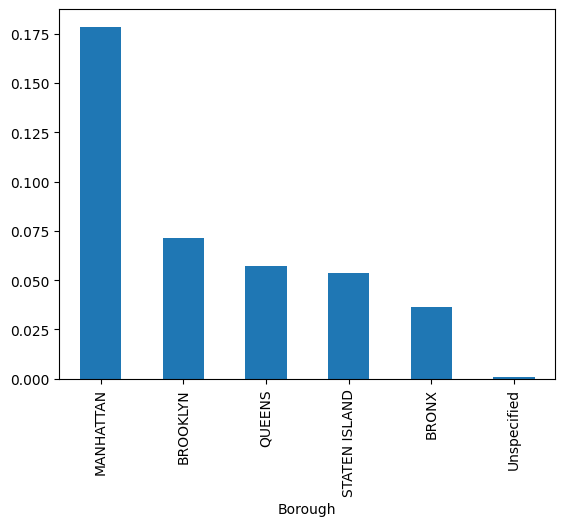

In [10]:
# plot the last result
res.sort_values(ascending=False).plot(kind="bar")